# ch3 教師なし学習と前処理

# 3.3.2 データ変換の適用

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import mglearn

In [132]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer =  load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape, X_test.shape)

(426, 30) (143, 30)


In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [134]:
X_train_scaled = scaler.transform(X_train)
X_train[:6], X_train_scaled[:6]

(array([[1.522e+01, 3.062e+01, 1.034e+02, 7.169e+02, 1.048e-01, 2.087e-01,
         2.550e-01, 9.429e-02, 2.128e-01, 7.152e-02, 2.602e-01, 1.205e+00,
         2.362e+00, 2.265e+01, 4.625e-03, 4.844e-02, 7.359e-02, 1.608e-02,
         2.137e-02, 6.142e-03, 1.752e+01, 4.279e+01, 1.287e+02, 9.150e+02,
         1.417e-01, 7.917e-01, 1.170e+00, 2.356e-01, 4.089e-01, 1.409e-01],
        [1.496e+01, 1.910e+01, 9.703e+01, 6.873e+02, 8.992e-02, 9.823e-02,
         5.940e-02, 4.819e-02, 1.879e-01, 5.852e-02, 2.877e-01, 9.480e-01,
         2.171e+00, 2.487e+01, 5.332e-03, 2.115e-02, 1.536e-02, 1.187e-02,
         1.522e-02, 2.815e-03, 1.625e+01, 2.619e+01, 1.091e+02, 8.098e+02,
         1.313e-01, 3.030e-01, 1.804e-01, 1.489e-01, 2.962e-01, 8.472e-02],
        [1.468e+01, 2.013e+01, 9.474e+01, 6.845e+02, 9.867e-02, 7.200e-02,
         7.395e-02, 5.259e-02, 1.586e-01, 5.922e-02, 4.727e-01, 1.240e+00,
         3.195e+00, 4.540e+01, 5.718e-03, 1.162e-02, 1.998e-02, 1.109e-02,
         1.410e-02, 2.0

In [135]:
print(X_train.min(axis=0), X_train.max(axis=0))
print(X_train_scaled.min(axis=0), X_train_scaled.max(axis=0))



[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02] [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [136]:
X_test_scaled = scaler.transform(X_test)
print(X_test.min(axis=0), X_test.max(axis=0))
print(X_test_scaled.min(axis=0), X_test_scaled.max(axis=0))


[7.691e+00 1.038e+01 4.834e+01 1.704e+02 6.828e-02 3.116e-02 0.000e+00
 0.000e+00 1.365e-01 4.996e-02 1.115e-01 3.871e-01 8.484e-01 7.228e+00
 2.866e-03 3.746e-03 0.000e+00 0.000e+00 7.882e-03 1.087e-03 8.678e+00
 1.420e+01 5.449e+01 2.236e+02 8.774e-02 5.131e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02] [2.722e+01 3.381e+01 1.821e+02 2.250e+03 1.425e-01 3.454e-01 3.754e-01
 1.878e-01 2.906e-01 9.744e-02 1.292e+00 2.612e+00 1.012e+01 1.587e+02
 1.604e-02 1.006e-01 3.038e-01 3.322e-02 7.895e-02 1.220e-02 3.312e+01
 4.178e+01 2.208e+02 3.216e+03 2.098e-01 1.058e+00 1.252e+00 2.688e-01
 6.638e-01 2.075e-01]
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032] [0.9578778  0.81501522 0.95577

bins (51,) 6.981 28.11 [ 6.981    7.40358  7.82616  8.24874  8.67132  9.0939   9.51648  9.93906
 10.36164 10.78422 11.2068  11.62938 12.05196 12.47454 12.89712 13.3197
 13.74228 14.16486 14.58744 15.01002 15.4326  15.85518 16.27776 16.70034
 17.12292 17.5455  17.96808 18.39066 18.81324 19.23582 19.6584  20.08098
 20.50356 20.92614 21.34872 21.7713  22.19388 22.61646 23.03904 23.46162
 23.8842  24.30678 24.72936 25.15194 25.57452 25.9971  26.41968 26.84226
 27.26484 27.68742 28.11   ]
malignant[:, i] (212,) 10.95 28.11 [17.99 20.57 19.69 11.42 20.29 12.45]
bins (51,) 9.71 39.28 [ 9.71   10.3014 10.8928 11.4842 12.0756 12.667  13.2584 13.8498 14.4412
 15.0326 15.624  16.2154 16.8068 17.3982 17.9896 18.581  19.1724 19.7638
 20.3552 20.9466 21.538  22.1294 22.7208 23.3122 23.9036 24.495  25.0864
 25.6778 26.2692 26.8606 27.452  28.0434 28.6348 29.2262 29.8176 30.409
 31.0004 31.5918 32.1832 32.7746 33.366  33.9574 34.5488 35.1402 35.7316
 36.323  36.9144 37.5058 38.0972 38.6886 39.28  ]
ma

bins (51,) 0.0 0.05279 [0.        0.0010558 0.0021116 0.0031674 0.0042232 0.005279  0.0063348
 0.0073906 0.0084464 0.0095022 0.010558  0.0116138 0.0126696 0.0137254
 0.0147812 0.015837  0.0168928 0.0179486 0.0190044 0.0200602 0.021116
 0.0221718 0.0232276 0.0242834 0.0253392 0.026395  0.0274508 0.0285066
 0.0295624 0.0306182 0.031674  0.0327298 0.0337856 0.0348414 0.0358972
 0.036953  0.0380088 0.0390646 0.0401204 0.0411762 0.042232  0.0432878
 0.0443436 0.0453994 0.0464552 0.047511  0.0485668 0.0496226 0.0506784
 0.0517342 0.05279  ]
malignant[:, i] (212,) 0.005174 0.0409 [0.01587 0.0134  0.02058 0.01867 0.01885 0.01137]
bins (51,) 0.007882 0.07895 [0.007882   0.00930336 0.01072472 0.01214608 0.01356744 0.0149888
 0.01641016 0.01783152 0.01925288 0.02067424 0.0220956  0.02351696
 0.02493832 0.02635968 0.02778104 0.0292024  0.03062376 0.03204512
 0.03346648 0.03488784 0.0363092  0.03773056 0.03915192 0.04057328
 0.04199464 0.043416   0.04483736 0.04625872 0.04768008 0.04910144
 0.05052

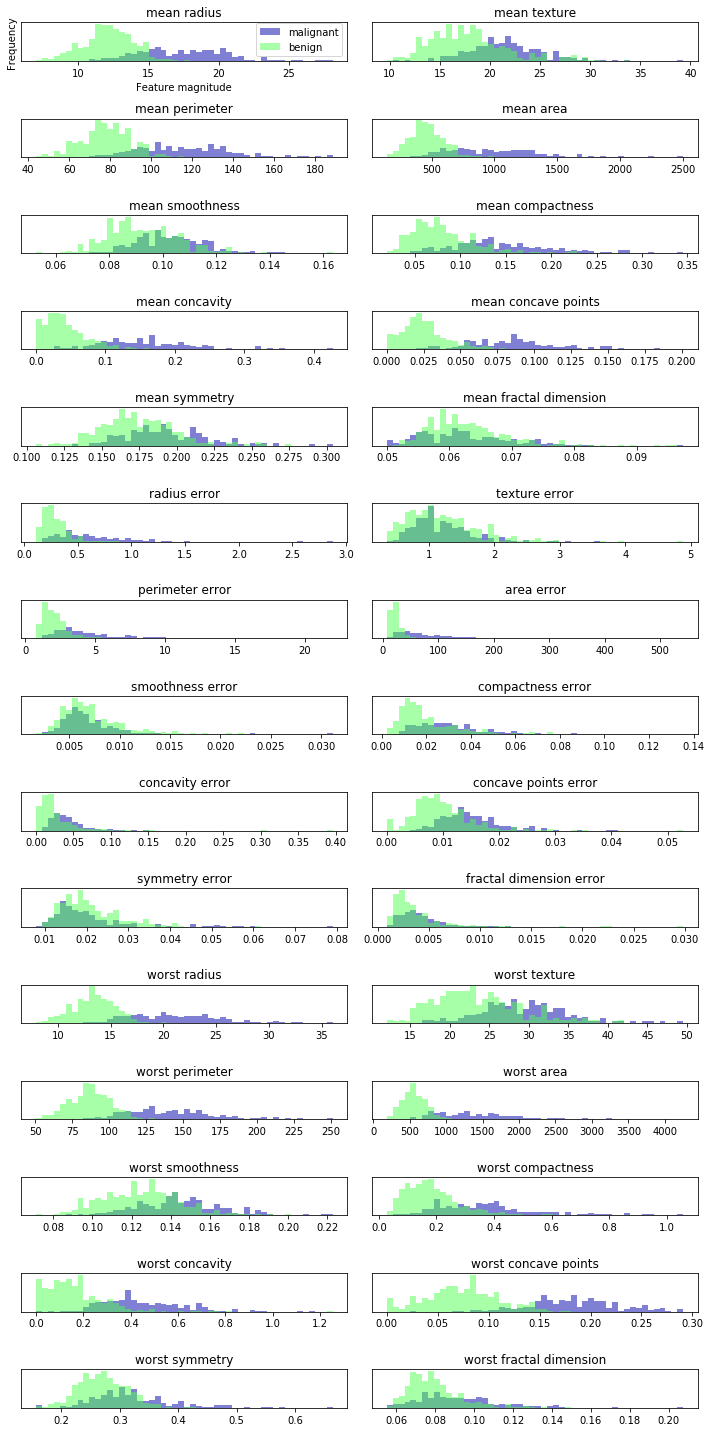

In [137]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    print("bins", bins.shape, bins.min(), bins.max(), bins)
    print("malignant[:, i]", malignant[:, i].shape, malignant[:, i].min(), 
          malignant[:, i].max(), malignant[:, i][:6])
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")

fig.tight_layout()

In [138]:
print(axes)
print(ax)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0fa72f1400>


# PCAを適用する 前に、 データ を StandardScalerでス ケール変換し、 個々 の特徴量の分散が1になるよ う にする。

In [139]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [140]:
cancer.data.shape

(569, 30)

In [141]:
cancer.data[:6, :3]

array([[ 17.99,  10.38, 122.8 ],
       [ 20.57,  17.77, 132.9 ],
       [ 19.69,  21.25, 130.  ],
       [ 11.42,  20.38,  77.58],
       [ 20.29,  14.34, 135.1 ],
       [ 12.45,  15.7 ,  82.57]])

In [142]:
X_scaled[:6, :3]

array([[ 1.09706398, -2.07333501,  1.26993369],
       [ 1.82982061, -0.35363241,  1.68595471],
       [ 1.57988811,  0.45618695,  1.56650313],
       [-0.76890929,  0.25373211, -0.59268717],
       [ 1.75029663, -1.15181643,  1.77657315],
       [-0.47637467, -0.8353353 , -0.38714807]])

In [143]:
scaler.mean_

array([1.41272917e+01, 1.92896485e+01, 9.19690334e+01, 6.54889104e+02,
       9.63602812e-02, 1.04340984e-01, 8.87993158e-02, 4.89191459e-02,
       1.81161863e-01, 6.27976098e-02, 4.05172056e-01, 1.21685343e+00,
       2.86605923e+00, 4.03370791e+01, 7.04097891e-03, 2.54781388e-02,
       3.18937163e-02, 1.17961371e-02, 2.05422988e-02, 3.79490387e-03,
       1.62691898e+01, 2.56772232e+01, 1.07261213e+02, 8.80583128e+02,
       1.32368594e-01, 2.54265044e-01, 2.72188483e-01, 1.14606223e-01,
       2.90075571e-01, 8.39458172e-02])

In [144]:
scaler.var_

array([1.23970943e+01, 1.84663974e+01, 5.89402799e+02, 1.23625903e+05,
       1.97452073e-04, 2.78428549e-03, 6.34407875e-03, 1.50301462e-03,
       7.50222008e-04, 4.97611152e-05, 7.67671984e-02, 3.03781123e-01,
       4.08071149e+00, 2.06579462e+03, 8.99927022e-06, 3.20139261e-04,
       9.09596835e-04, 3.80055080e-05, 6.82128053e-05, 6.98938631e-06,
       2.33191693e+01, 3.77100918e+01, 1.12714643e+03, 3.23597671e+05,
       5.20403629e-04, 2.47112650e-02, 4.34475982e-02, 4.31314711e-03,
       3.82085668e-03, 3.25636075e-04])

In [145]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(X_scaled.shape, X_pca.shape)

(569, 30) (569, 2)


Text(0,0.5,'Second principal component')

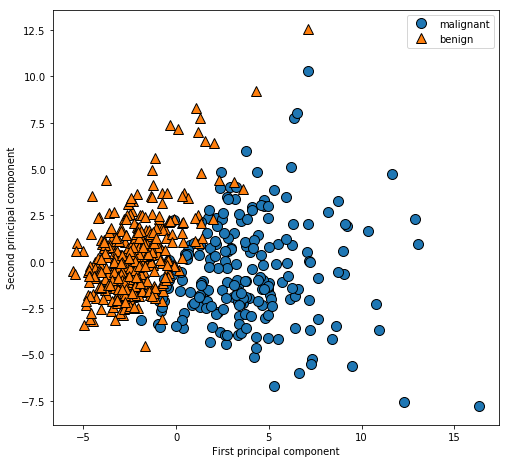

In [146]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [147]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Text(0,0.5,'Principal components')

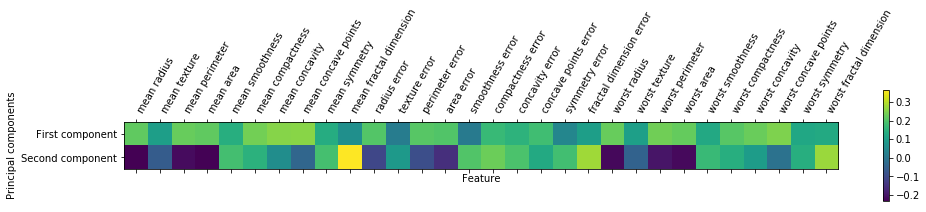

In [148]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

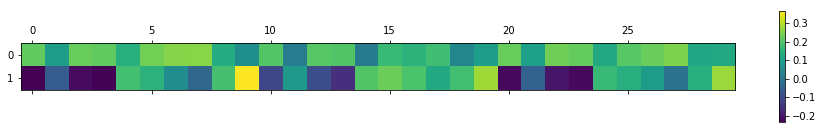

In [149]:
plt.matshow(pca.components_)
plt.colorbar()

# 3.4.1.2 固有顔による特徴量抽出

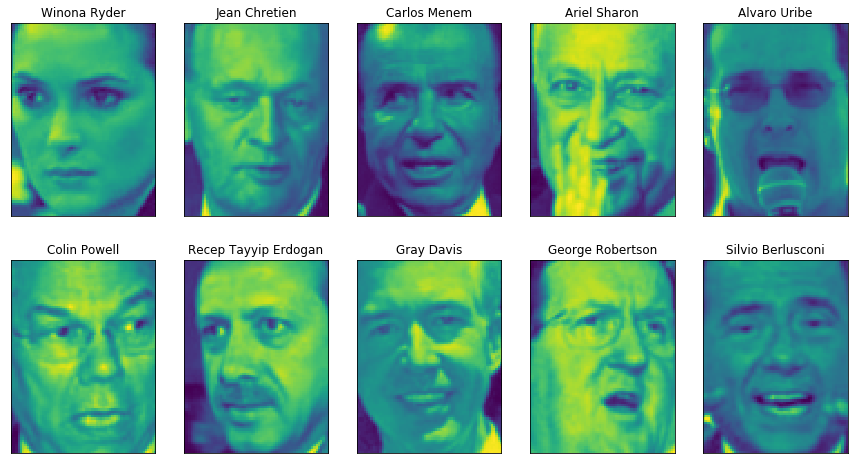

In [150]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [151]:
people

{'DESCR': 'LFW faces dataset',
 'data': array([[ 57.      ,  60.333332,  78.      , ...,  17.333334,  16.666666,
          22.666666],
        [ 66.666664,  80.666664,  88.666664, ...,   8.666667,   8.333333,
           9.333333],
        [ 18.666666,  14.333333,  15.      , ...,  22.666666,  22.666666,
          25.666666],
        ...,
        [ 77.333336,  90.333336,  93.333336, ..., 233.66667 , 234.33333 ,
         230.66667 ],
        [ 87.666664,  71.666664,  63.333332, ...,  96.      ,  92.333336,
          96.333336],
        [ 91.      ,  90.666664,  94.666664, ...,  40.333332,  42.333332,
          42.333332]], dtype=float32),
 'images': array([[[ 57.       ,  60.333332 ,  78.       , ...,  40.666668 ,
           36.666668 ,  34.       ],
         [ 52.666668 ,  60.       ,  92.       , ...,  46.666668 ,
           36.       ,  30.       ],
         [ 46.       ,  66.       , 113.333336 , ...,  51.       ,
           43.333332 ,  37.666668 ],
         ...,
         [ 61.     

In [152]:
people.images[0].shape

(87, 65)

In [153]:
people.images[0]

array([[ 57.      ,  60.333332,  78.      , ...,  40.666668,  36.666668,
         34.      ],
       [ 52.666668,  60.      ,  92.      , ...,  46.666668,  36.      ,
         30.      ],
       [ 46.      ,  66.      , 113.333336, ...,  51.      ,  43.333332,
         37.666668],
       ...,
       [ 61.      ,  62.666668,  62.333332, ...,  19.      ,  18.333334,
         18.666666],
       [ 62.666668,  64.666664,  67.      , ...,  17.333334,  18.      ,
         22.333334],
       [ 65.333336,  68.      ,  67.      , ...,  17.333334,  16.666666,
         22.666666]], dtype=float32)

In [154]:
people.images.shape, people.target_names

((3023, 87, 65), array(['Alejandro Toledo', 'Alvaro Uribe', 'Amelie Mauresmo',
        'Andre Agassi', 'Angelina Jolie', 'Ariel Sharon',
        'Arnold Schwarzenegger', 'Atal Bihari Vajpayee', 'Bill Clinton',
        'Carlos Menem', 'Colin Powell', 'David Beckham', 'Donald Rumsfeld',
        'George Robertson', 'George W Bush', 'Gerhard Schroeder',
        'Gloria Macapagal Arroyo', 'Gray Davis', 'Guillermo Coria',
        'Hamid Karzai', 'Hans Blix', 'Hugo Chavez', 'Igor Ivanov',
        'Jack Straw', 'Jacques Chirac', 'Jean Chretien',
        'Jennifer Aniston', 'Jennifer Capriati', 'Jennifer Lopez',
        'Jeremy Greenstock', 'Jiang Zemin', 'John Ashcroft',
        'John Negroponte', 'Jose Maria Aznar', 'Juan Carlos Ferrero',
        'Junichiro Koizumi', 'Kofi Annan', 'Laura Bush',
        'Lindsay Davenport', 'Lleyton Hewitt', 'Luiz Inacio Lula da Silva',
        'Mahmoud Abbas', 'Megawati Sukarnoputri', 'Michael Bloomberg',
        'Naomi Watts', 'Nestor Kirchner', 'Paul Bremer

In [155]:
# 各タ ーゲッ トの出現回数を カウント
counts = np.bincount(people.target)
# タ ーゲッ ト名と 出現回数を 並べて表示
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [156]:
people.target

array([61, 25,  9, ..., 14, 15, 14])

In [157]:
mask = np.zeros(people.target.shape, dtype=np.bool)
print("mask", mask.shape, mask)

for target in np.unique(people.target):
    print(np.where(people.target == target))
    mask[np.where(people.target == target)[0][:50]] = 1
    
print(mask)

    
X_people = people.data[mask]
y_people = people.target[mask]
# 0から 255で表現さ れている 、 グレースケールの値0と 1の間に変換
# こ う したほう が、 数値的に安定する
X_people = X_people / 255.

print(people.data.shape, X_people.shape)

mask (3023,) [False False False ... False False False]
(array([  58,   72,   90,  314,  494,  496,  598,  650,  960, 1078, 1212,
       1243, 1265, 1356, 1497, 1586, 1622, 1793, 1803, 1816, 1881, 1952,
       1962, 2003, 2068, 2179, 2183, 2239, 2373, 2441, 2510, 2535, 2622,
       2649, 2651, 2697, 2819, 2960, 2998]),)
(array([   4,   17,   41,   87,  142,  216,  333,  413,  417,  508,  857,
        876,  940,  944,  949, 1165, 1307, 1505, 1529, 1539, 1729, 1807,
       1837, 1933, 2211, 2243, 2254, 2269, 2285, 2290, 2360, 2387, 2616,
       2636, 2926]),)
(array([  65,  188,  266,  509,  912, 1055, 1102, 1353, 1379, 1468, 1868,
       1924, 2073, 2115, 2180, 2272, 2344, 2412, 2444, 2492, 2531]),)
(array([  27,  237,  388,  449,  461,  612,  623,  676,  738,  770, 1106,
       1132, 1187, 1270, 1273, 1280, 1710, 1714, 1752, 1942, 2056, 2074,
       2160, 2176, 2206, 2216, 2255, 2527, 2601, 2608, 2675, 2738, 2742,
       2801, 2876, 3010]),)
(array([  43,   74,  133,  221,  279,  486, 1

# 3.4.2 非負値行列因子分解（ NMF）

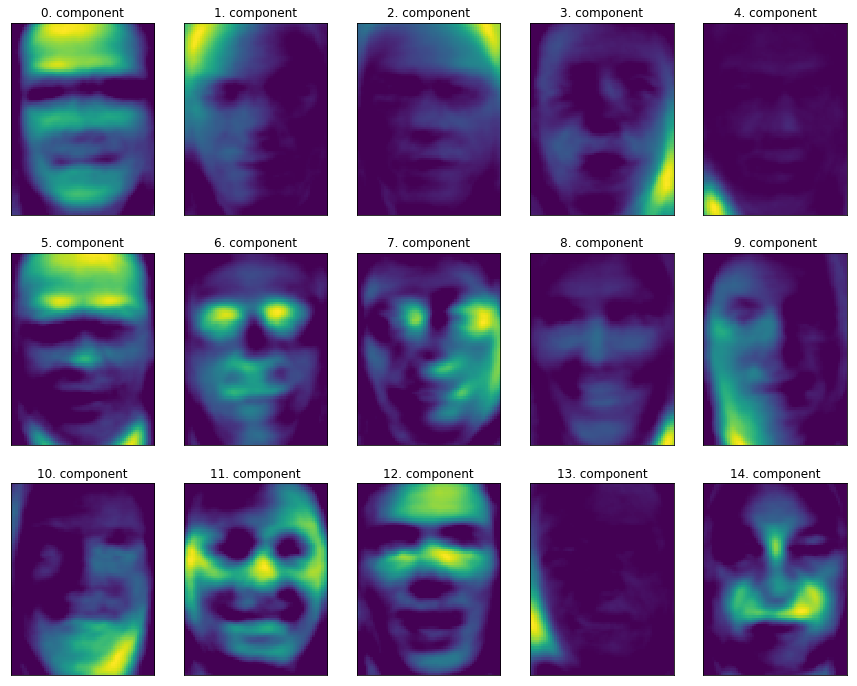

In [158]:
from sklearn.decomposition import NMF

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [159]:
nmf.components_.shape

(15, 5655)

In [160]:
nmf.components_


array([[0.        , 0.        , 0.        , ..., 0.00271897, 0.03225011,
        0.05210912],
       [0.61802397, 0.63793213, 0.66951829, ..., 0.        , 0.        ,
        0.        ],
       [0.2882431 , 0.30741308, 0.3205351 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00849081, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21345179, 0.14675736, 0.08958794, ..., 0.04881211, 0.00994787,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

[ 947 1245  737 ...  414  682 1202]


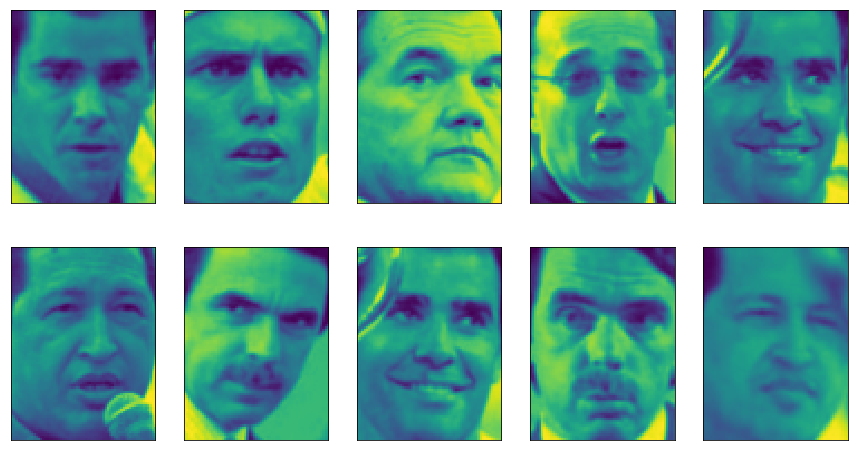

In [161]:
compn = 3

inds = np.argsort(X_train_nmf[:, compn])[::-1]
print(inds)
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [162]:
np.argsort(X_train_nmf[:, compn])

array([1202,  682,  414, ...,  737, 1245,  947])

In [163]:
# [::-1] はリバース

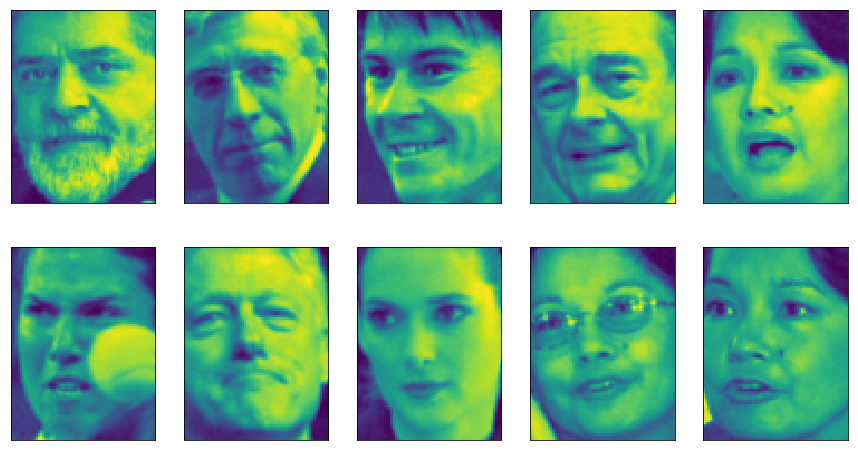

In [164]:
compn = 7
# 7つ目の成分でソート、 最初の10画像を表示
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0,0.5,'Signal')

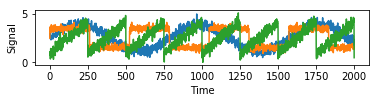

In [165]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [166]:
S.shape

(2000, 3)

In [167]:
# データを混ぜて100次元の状態を作る
A = np.random.RandomState(0).uniform(size=(100, 3))
A.shape

(100, 3)

In [168]:
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [169]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


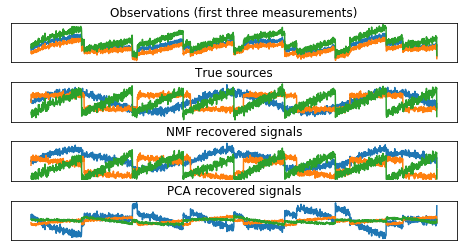

In [170]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True sources',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')


# 3.5.1.2 ベクトル量子化、 もしくは成分分解としてのk-means

In [171]:
from sklearn.cluster import KMeans

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people,
                                                    stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


Text(0,0.5,'nmf')

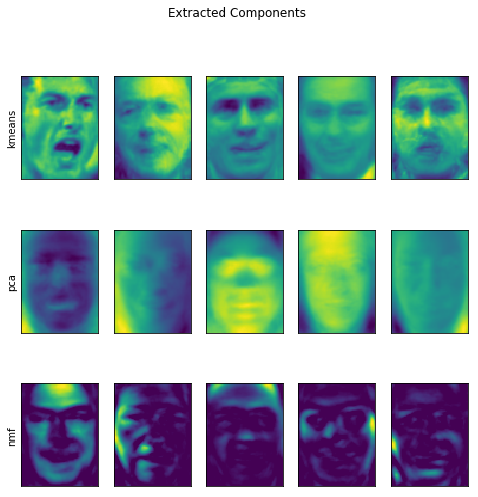

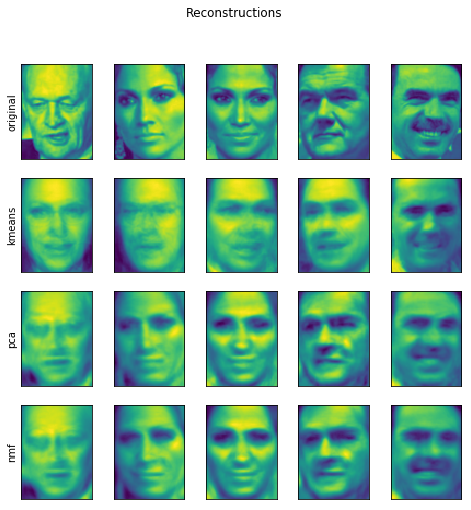

In [172]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")

for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T, X_test, 
                                                  X_reconstructed_kmeans,
                                                  X_reconstructed_pca,
                                                  X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

In [173]:
kmeans.cluster_centers_

array([[0.16862746, 0.151634  , 0.12810458, ..., 0.08758169, 0.08104575,
        0.07189542],
       [0.38847297, 0.39489007, 0.40023765, ..., 0.44515747, 0.3979798 ,
        0.35995245],
       [0.8003565 , 0.7857398 , 0.7404635 , ..., 0.5153892 , 0.5214498 ,
        0.5202614 ],
       ...,
       [0.18075526, 0.17828614, 0.17058824, ..., 0.6385621 , 0.6287582 ,
        0.6068264 ],
       [0.26840958, 0.28278866, 0.30379084, ..., 0.45638344, 0.43163398,
        0.41603485],
       [0.3554419 , 0.3541347 , 0.35822678, ..., 0.19647627, 0.20687695,
        0.22205171]], dtype=float32)

In [174]:
kmeans.cluster_centers_.shape

(100, 5655)

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


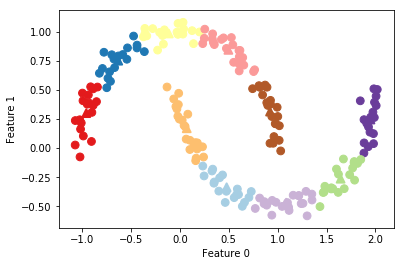

In [175]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("Cluster memberships:\n{}".format(y_pred))

In [176]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


# 3.5.2 凝集型クラスタリング

Text(0,0.5,'Feature 1')

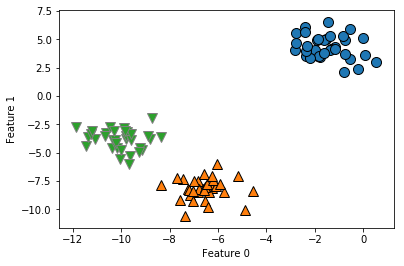

In [177]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [178]:
from scipy.cluster.hierarchy import dendrogram, ward

X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)
linkage_array

array([[ 1.        ,  4.        ,  0.3320945 ,  2.        ],
       [ 6.        ,  9.        ,  0.64580193,  2.        ],
       [ 2.        ,  8.        ,  0.92683223,  2.        ],
       [ 0.        , 11.        ,  1.1803787 ,  2.        ],
       [ 5.        , 15.        ,  1.30311575,  3.        ],
       [ 7.        , 13.        ,  1.4440339 ,  3.        ],
       [ 3.        , 14.        ,  1.60041812,  3.        ],
       [12.        , 18.        ,  2.07815795,  5.        ],
       [10.        , 17.        ,  2.15981886,  4.        ],
       [16.        , 20.        ,  6.55024854,  7.        ],
       [19.        , 21.        ,  7.92446877, 12.        ]])

Text(0,0.5,'cluster distance')

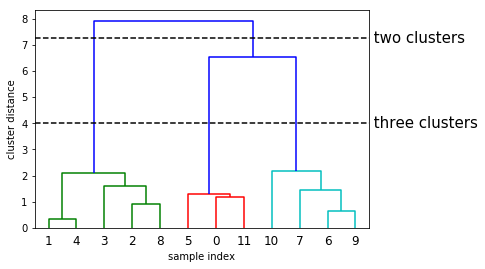

In [179]:
dendrogram(linkage_array)
ax = plt.gca()

bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')

ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va="center", fontdict={'size':15})
ax.text(bounds[1], 4, ' three clusters', va="center", fontdict={'size':15})
plt.xlabel("sample index")
plt.ylabel("cluster distance")

# 3.5.3 DBSCAN

In [180]:
from sklearn.cluster import DBSCAN

X, y = make_blobs(random_state=0, n_samples=12)
print(X.shape)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters

(12, 2)


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [181]:
dbscan = DBSCAN(eps=2, min_samples=2)
clusters = dbscan.fit_predict(X)
clusters

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


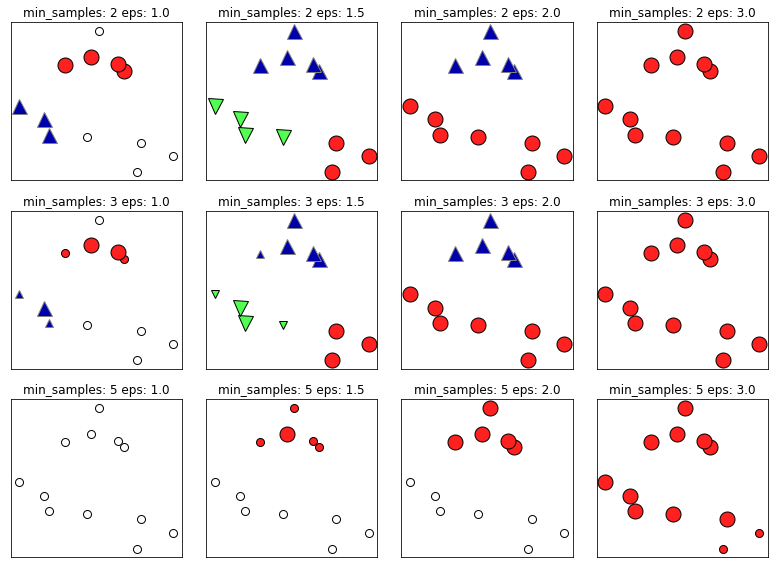

In [182]:
mglearn.plots.plot_dbscan()

Text(0,0.5,'feature 1')

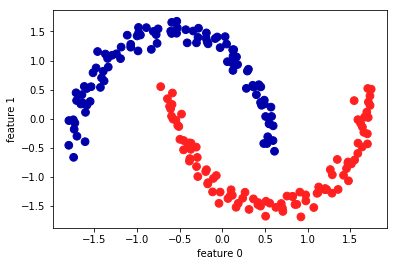

In [183]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 3.5.4 クラスタリングアルゴリズムの比較と評価

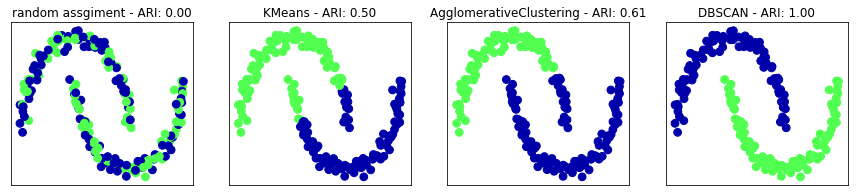

In [184]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise =0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15,3), subplot_kw={'xticks':(), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, 
              s=60)
axes[0].set_title("random assgiment - ARI: {:.2f}".format(
    adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # クラスタ割り当てとクラスタセンタをプロット
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

In [185]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
accuracy_score(clusters1, clusters2)

0.0

In [186]:
adjusted_rand_score(clusters1, clusters2)

1.0

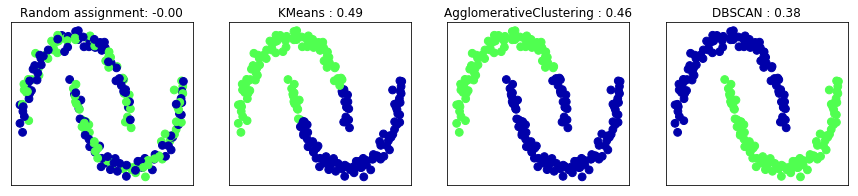

In [187]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

ig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
    silhouette_score(X_scaled, random_clusters)))

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # クラスタ割り当てとクラスタセンタをプロット
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
                                      silhouette_score(X_scaled, clusters)))


In [188]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100, whiten=True, random_state=0)
pca

PCA(copy=True, iterated_power='auto', n_components=100, random_state=0,
  svd_solver='auto', tol=0.0, whiten=True)

In [189]:
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

X_pca.shape

(2063, 100)

In [190]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
labels

array([-1, -1, -1, ..., -1, -1, -1])

In [191]:
np.unique(labels)

array([-1])

In [192]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
np.unique(labels)

array([-1])

In [193]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1  0]


In [194]:
np.bincount(labels + 1)

array([  32, 2031])

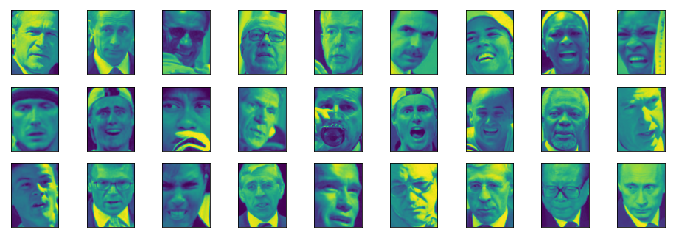

In [195]:


noise = X_people[labels == -1]

fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [196]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print(np.unique(labels))
    print(np.bincount(labels + 1))



eps=1
[-1]
[2063]

eps=3
[-1]
[2063]

eps=5
[-1]
[2063]

eps=7
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
[2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
[-1  0  1  2]
[1307  750    3    3]

eps=11
[-1  0]
[ 413 1650]

eps=13
[-1  0]
[ 120 1943]


[-1 -1 -1 ... -1 -1 -1]
[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)
[False False False False False False] (2063,)


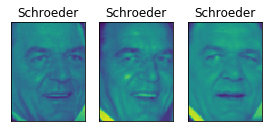

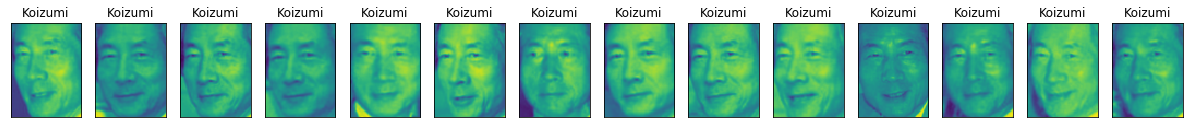

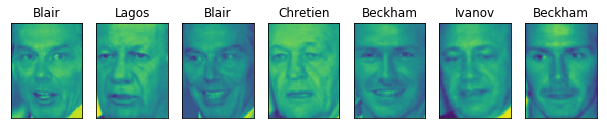

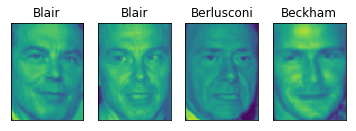

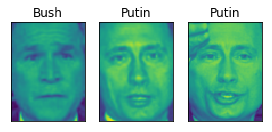

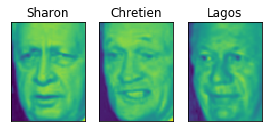

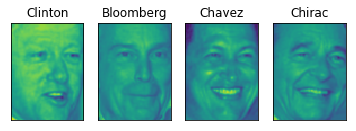

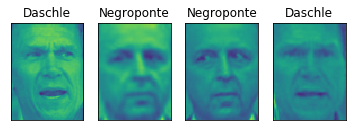

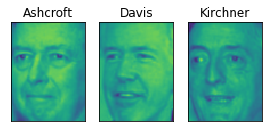

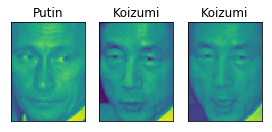

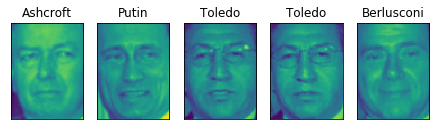

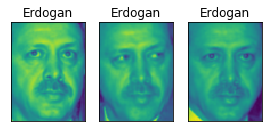

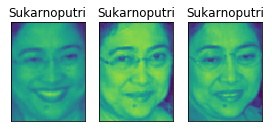

In [200]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)
print(labels)
print(np.unique(labels))
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    print(mask[:6], mask.shape)
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [202]:
y_people

array([61, 25,  9, ...,  9, 37, 22])

In [203]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print(np.bincount(labels_km))

[155 175 238  75 358 257  91 219 323 172]


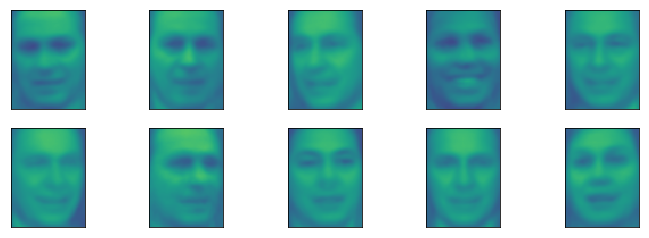

In [204]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape),
              vmin=0, vmax=1)

In [205]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))

Cluster sizes agglomerative clustering: [169 660 144 329 217  85  18 261  31 149]


In [206]:
print("ARI: {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))

ARI: 0.09


In [208]:
linkage_array = ward(X_pca)
linkage_array

array([[1.20100000e+03, 1.70600000e+03, 1.93184012e+00, 2.00000000e+00],
       [8.42000000e+02, 1.51900000e+03, 4.01452650e+00, 2.00000000e+00],
       [7.34000000e+02, 9.22000000e+02, 4.61852547e+00, 2.00000000e+00],
       ...,
       [4.11600000e+03, 4.11900000e+03, 3.87066805e+01, 6.65000000e+02],
       [4.12000000e+03, 4.12100000e+03, 4.27918244e+01, 1.39800000e+03],
       [4.12200000e+03, 4.12300000e+03, 4.53106107e+01, 2.06300000e+03]])

Text(0,0.5,'Cluster distance')

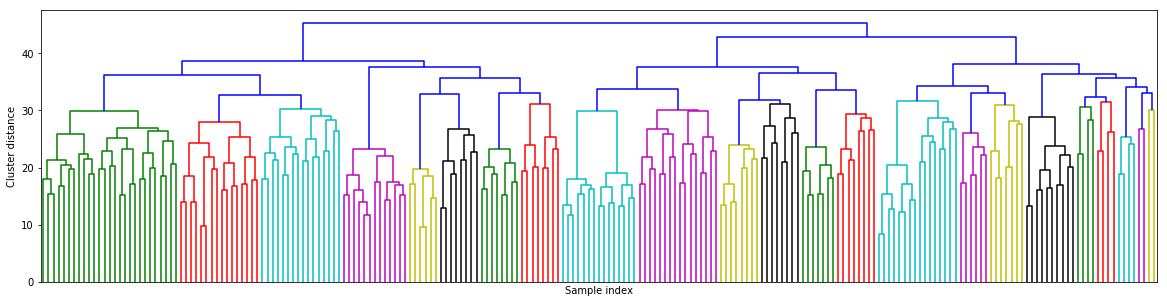

In [209]:
plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

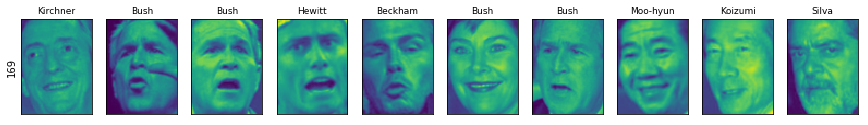

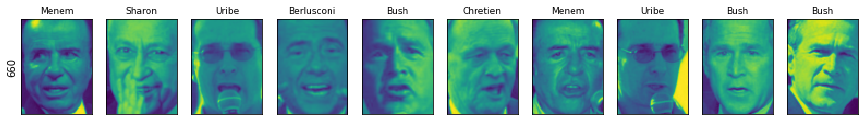

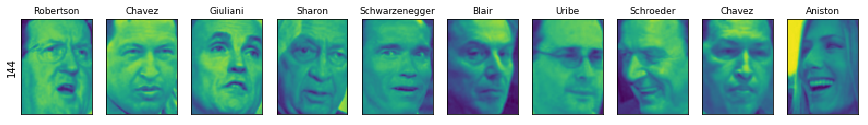

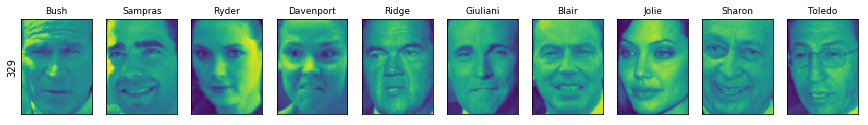

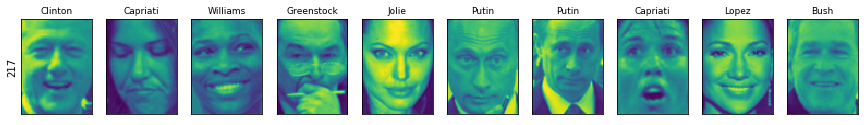

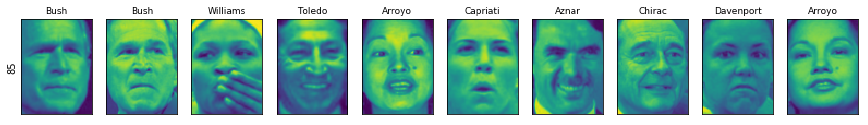

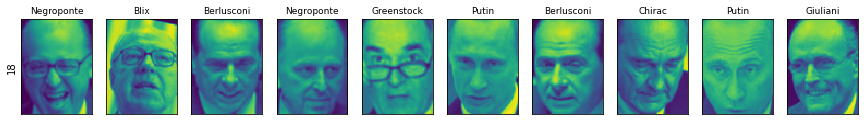

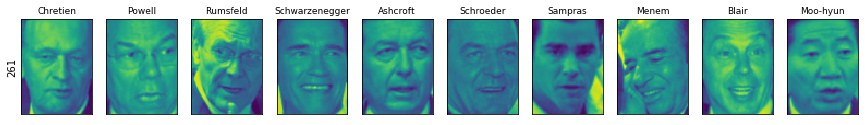

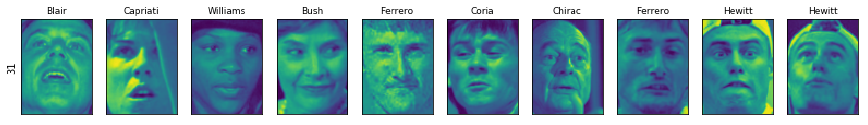

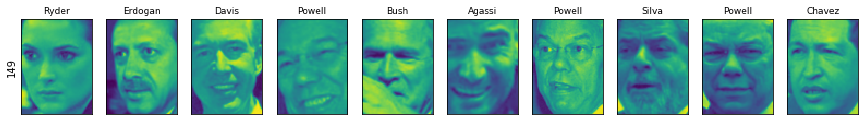

In [210]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))

    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})

cluster sizes agglomerative clustering: [ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


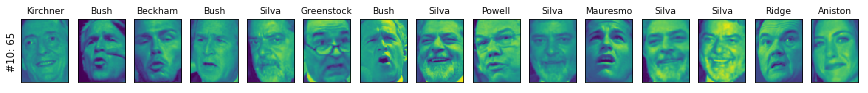

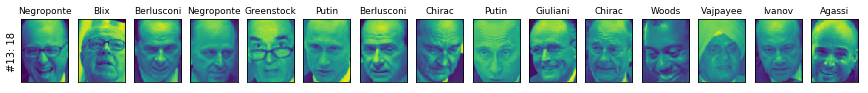

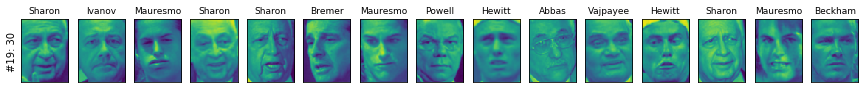

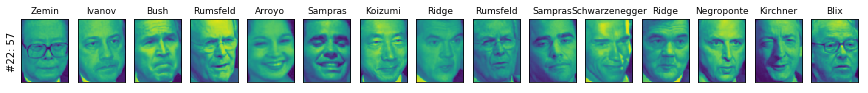

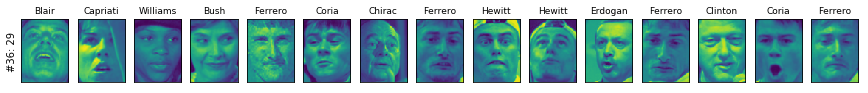

In [211]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: #「 面白そうな」 クラスタを選んだ
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                      labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1],
                     fontdict={'fontsize': 9})
        for i in range(cluster_size, 15):
            axes[i].set_visible(False)